In [94]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

### Calculating ADPred's averages

In [19]:
files = glob.glob("/Users/sanjanakotha/Desktop/Staller_Lab/SFARI/data/adpred_split_variants/*.csv")

all_var_df_list = []
for f in files:
    csv = pd.read_csv(f, index_col = 0)
    all_var_df_list.append(csv)
adpred = pd.concat(all_var_df_list)
adpred = adpred.rename(columns = {"id" : "GeneName",
                                     "AAseq" : "ProteinWindowSeq"})
adpred = adpred.sort_values(by = "Unnamed: 0")
adpred = adpred.reset_index()
adpred

,Unnamed: 0,GeneName,ProteinWindowSeq,position_wise_prob_adpred,Unnamed: 0.1,len
0,0,GLIS1_Q8NBF1_AD_447-620|g.53506627C>T(p.Asp619...,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,"[8.08375131e-04,2.06423900e-03,3.40039120e-03,...",NaN,NaN
1,0,SRCAP_Q6ZRS2_AD_198-1445|g.30711973A>C(p.Glu54...,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,"[0.00301478,0.00336563,0.00338995,...,0.001278...",600.0,1248.0
2,1,GLIS1_Q8NBF1_AD_447-620|g.53506630T>C(p.Thr618...,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,"[8.08375131e-04,2.06423900e-03,3.40039120e-03,...",NaN,NaN
3,1,SRCAP_Q6ZRS2_AD_198-1445|g.30711975G>A(p.Glu54...,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,"[0.00301478,0.00336563,0.00338995,...,0.001278...",601.0,1248.0
4,2,SRCAP_Q6ZRS2_AD_198-1445|g.30711977A>T(p.Glu54...,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,"[0.0030299 ,0.00340213,0.00341189,...,0.001278...",602.0,1248.0
...,...,...,...,...,...,...
3053,3053,ESR2_Q92731_AD_1-148,MDIKNSPSSLNSPSSYNCSQSILPLEHGSIYIPSSYVDSHHEYPAM...,"[2.43807517e-04,5.13511361e-04,4.61821532e-04,...",NaN,NaN
3054,3054,ESR2_Q92731_AD_304-500,KELVHMISWAKKIPGFVELSLFDQVRLLESCWMEVLMMGLMWRSID...,"[1.53499190e-03,4.36764583e-03,4.81981738e-03,...",NaN,NaN
3055,3055,NCOA1_Q15788_AD_1-93,MSGLGDSSSDPANPDSHKRKGSPCDTLASSTEKRRREQENKYLEEL...,"[5.53751073e-04,4.26910730e-04,3.83757026e-04,...",NaN,NaN
3056,3056,NFE2L3 / NF2L3_Q9Y4A8_AD_252-451,HLNGTDTSFSLEDLFQLLSSQPENSLEGISLGDIPLPGSISDGMNS...,"[9.17278305e-02,1.04091138e-01,1.99391380e-01,...",NaN,NaN


In [56]:
def activity_string_to_avg(prob_string, adpred = True):
    if adpred:
        if "..." in prob_string:
            return -1 * np.inf 
    elif type(prob_string) != str: 
        print("ERROR, not string")
        print(prob_string)
        return -1 * np.inf
    else: 
        a = prob_string.replace('\n','')
        a = a.replace('[','')
        a = a.replace(']','').split(',')
        b = []
        for x in a:
            if x != "":
                b.append(float(x))
        return np.mean(b)

In [30]:
adpred["adpred_avg"] = [activity_string_to_avg(_) for _ in adpred["position_wise_prob_adpred"]]
adpred["id"] = adpred["GeneName"]
adpred["seq"] = adpred["ProteinWindowSeq"]
adpred = adpred[["id", "seq", "adpred_avg"]]
adpred

,id,seq,adpred_avg
0,GLIS1_Q8NBF1_AD_447-620|g.53506627C>T(p.Asp619...,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,0.066847
1,SRCAP_Q6ZRS2_AD_198-1445|g.30711973A>C(p.Glu54...,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,-inf
2,GLIS1_Q8NBF1_AD_447-620|g.53506630T>C(p.Thr618...,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,0.073093
3,SRCAP_Q6ZRS2_AD_198-1445|g.30711975G>A(p.Glu54...,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,-inf
4,SRCAP_Q6ZRS2_AD_198-1445|g.30711977A>T(p.Glu54...,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,-inf
...,...,...,...
3053,ESR2_Q92731_AD_1-148,MDIKNSPSSLNSPSSYNCSQSILPLEHGSIYIPSSYVDSHHEYPAM...,0.034844
3054,ESR2_Q92731_AD_304-500,KELVHMISWAKKIPGFVELSLFDQVRLLESCWMEVLMMGLMWRSID...,0.200249
3055,NCOA1_Q15788_AD_1-93,MSGLGDSSSDPANPDSHKRKGSPCDTLASSTEKRRREQENKYLEEL...,0.044879
3056,NFE2L3 / NF2L3_Q9Y4A8_AD_252-451,HLNGTDTSFSLEDLFQLLSSQPENSLEGISLGDIPLPGSISDGMNS...,0.349332


### Calculating PADDLE-noSS' averages

In [24]:
paddle_long = pd.read_csv("../output/PADDLE_noSS_SFARI_Variants_output.csv", index_col = 0)
paddle_long

,id,AAseq,tiled_sequences,paddle_noSS_pred
0,GLIS1_Q8NBF1_AD_447-620|g.53506627C>T(p.Asp619...,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,-0.042140
1,GLIS1_Q8NBF1_AD_447-620|g.53506627C>T(p.Asp619...,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,ESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLPS...,0.090035
2,GLIS1_Q8NBF1_AD_447-620|g.53506627C>T(p.Asp619...,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,STRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLPSK...,0.045005
3,GLIS1_Q8NBF1_AD_447-620|g.53506627C>T(p.Asp619...,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,TRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLPSKP...,0.011374
4,GLIS1_Q8NBF1_AD_447-620|g.53506627C>T(p.Asp619...,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,RDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLPSKPS...,0.027149
...,...,...,...,...
1209888,TFE3_P19532_AD_472-575,PGAATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,LGLEDILMEEEEGVVGGLSGGALSPLRAASDPLLSSVSPAVSKASS...,0.872204
1209889,TFE3_P19532_AD_472-575,PGAATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,GLEDILMEEEEGVVGGLSGGALSPLRAASDPLLSSVSPAVSKASSR...,0.902151
1209890,TFE3_P19532_AD_472-575,PGAATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,LEDILMEEEEGVVGGLSGGALSPLRAASDPLLSSVSPAVSKASSRR...,0.893960
1209891,TFE3_P19532_AD_472-575,PGAATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,EDILMEEEEGVVGGLSGGALSPLRAASDPLLSSVSPAVSKASSRRS...,0.410317


In [29]:
paddle = paddle_long[["id", "paddle_noSS_pred"]].groupby(["id"]).agg(np.mean).reset_index()
paddle

,id,paddle_noSS_pred
0,ARNT2_Q9HBZ2_AD_524-717,1.211217
1,ARNT2_Q9HBZ2_AD_524-717|g.80576924A>C(p.Gln524...,1.211188
2,ARNT2_Q9HBZ2_AD_524-717|g.80576938C>G(p.Pro529...,1.208393
3,ARNT2_Q9HBZ2_AD_524-717|g.80576940T>C(p.Ser530...,1.210570
4,ARNT2_Q9HBZ2_AD_524-717|g.80576941C>A(p.Ser530...,1.213389
...,...,...
3053,YY1_P25490_AD_1-69|g.100239438A>G(p.His65Arg),1.598038
3054,YY1_P25490_AD_1-69|g.100239445C>A(p.His67Gln),1.631318
3055,YY1_P25490_AD_1-69|g.100239446G>A(p.Ala68Thr),1.634427
3056,YY1_P25490_AD_1-69|g.100239447C>G(p.Ala68Gly),1.642081


### Calculating AD Hunter's averages

In [76]:
adhunter_raw_var = pd.read_csv("../data/adhunter_preds.csv", index_col = 0)
adhunter_raw_wt = pd.read_csv("../data/wt_adhunter_preds.csv", index_col = 0)
adhunter_raw = pd.concat([adhunter_raw_var, adhunter_raw_wt])
adhunter_raw["seq"] = adhunter_raw["sequence"]
adhunter_raw = adhunter_raw[["seq", "adhunter_preds"]]
adhunter_raw

,seq,adhunter_preds
0,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,"[25452.94140625, 23765.2734375, 26750.62890625..."
1,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,"[25452.94140625, 23765.2734375, 26750.62890625..."
2,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,"[25452.94140625, 23765.2734375, 26750.62890625..."
3,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,"[25452.94140625, 23765.2734375, 26750.62890625..."
4,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,"[25452.94140625, 23765.2734375, 26750.62890625..."
...,...,...
43,MDIKNSPSSLNSPSSYNCSQSILPLEHGSIYIPSSYVDSHHEYPAM...,"[47500.36328125, 33817.86328125, 34415.9101562..."
44,KELVHMISWAKKIPGFVELSLFDQVRLLESCWMEVLMMGLMWRSID...,"[136944.125, 138582.296875, 128650.828125, 110..."
45,MSGLGDSSSDPANPDSHKRKGSPCDTLASSTEKRRREQENKYLEEL...,"[21515.88671875, 22503.74609375, 29914.3710937..."
46,HLNGTDTSFSLEDLFQLLSSQPENSLEGISLGDIPLPGSISDGMNS...,"[125187.0625, 131845.1875, 117697.8203125, 111..."


In [77]:
adhunter = pd.merge(adpred[["id", "seq"]], adhunter_raw, on = "seq", how = "left")
adhunter

,id,seq,adhunter_preds
0,GLIS1_Q8NBF1_AD_447-620|g.53506627C>T(p.Asp619...,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,"[25452.94140625, 23765.2734375, 26750.62890625..."
1,SRCAP_Q6ZRS2_AD_198-1445|g.30711973A>C(p.Glu54...,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,"[54763.7890625, 49217.28515625, 50351.39453125..."
2,GLIS1_Q8NBF1_AD_447-620|g.53506630T>C(p.Thr618...,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,"[25452.94140625, 23765.2734375, 26750.62890625..."
3,SRCAP_Q6ZRS2_AD_198-1445|g.30711975G>A(p.Glu54...,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,"[54763.7890625, 49217.28515625, 50351.39453125..."
4,SRCAP_Q6ZRS2_AD_198-1445|g.30711977A>T(p.Glu54...,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,"[54763.7890625, 49217.28515625, 50351.39453125..."
...,...,...,...
3091,ESR2_Q92731_AD_1-148,MDIKNSPSSLNSPSSYNCSQSILPLEHGSIYIPSSYVDSHHEYPAM...,"[47500.36328125, 33817.86328125, 34415.9101562..."
3092,ESR2_Q92731_AD_304-500,KELVHMISWAKKIPGFVELSLFDQVRLLESCWMEVLMMGLMWRSID...,"[136944.125, 138582.296875, 128650.828125, 110..."
3093,NCOA1_Q15788_AD_1-93,MSGLGDSSSDPANPDSHKRKGSPCDTLASSTEKRRREQENKYLEEL...,"[21515.88671875, 22503.74609375, 29914.3710937..."
3094,NFE2L3 / NF2L3_Q9Y4A8_AD_252-451,HLNGTDTSFSLEDLFQLLSSQPENSLEGISLGDIPLPGSISDGMNS...,"[125187.0625, 131845.1875, 117697.8203125, 111..."


In [78]:
adhunter["adhunter_avg"] = [activity_string_to_avg(_, adpred = False) for _ in adhunter["adhunter_preds"]]
adhunter = adhunter[["id", "seq", "adhunter_avg"]]
adhunter

,id,seq,adhunter_avg
0,GLIS1_Q8NBF1_AD_447-620|g.53506627C>T(p.Asp619...,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,48932.122685
1,SRCAP_Q6ZRS2_AD_198-1445|g.30711973A>C(p.Glu54...,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,39537.376146
2,GLIS1_Q8NBF1_AD_447-620|g.53506630T>C(p.Thr618...,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,48961.368924
3,SRCAP_Q6ZRS2_AD_198-1445|g.30711975G>A(p.Glu54...,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,39515.172017
4,SRCAP_Q6ZRS2_AD_198-1445|g.30711977A>T(p.Glu54...,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,39533.580027
...,...,...,...
3091,ESR2_Q92731_AD_1-148,MDIKNSPSSLNSPSSYNCSQSILPLEHGSIYIPSSYVDSHHEYPAM...,52523.258063
3092,ESR2_Q92731_AD_304-500,KELVHMISWAKKIPGFVELSLFDQVRLLESCWMEVLMMGLMWRSID...,64238.809879
3093,NCOA1_Q15788_AD_1-93,MSGLGDSSSDPANPDSHKRKGSPCDTLASSTEKRRREQENKYLEEL...,31524.573929
3094,NFE2L3 / NF2L3_Q9Y4A8_AD_252-451,HLNGTDTSFSLEDLFQLLSSQPENSLEGISLGDIPLPGSISDGMNS...,86474.632570


### Merging individual predictor results into 1 table

In [79]:
results = pd.merge(adpred, paddle, on = "id")
results = pd.merge(results, adhunter, on = ["id", "seq"])
results = results.drop_duplicates()
results = results.reset_index(drop = True)
results

,id,seq,adpred_avg,paddle_noSS_pred,adhunter_avg
0,GLIS1_Q8NBF1_AD_447-620|g.53506627C>T(p.Asp619...,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,0.066847,1.040670,48932.122685
1,SRCAP_Q6ZRS2_AD_198-1445|g.30711973A>C(p.Glu54...,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,-inf,0.071697,39537.376146
2,GLIS1_Q8NBF1_AD_447-620|g.53506630T>C(p.Thr618...,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,0.073093,1.049132,48961.368924
3,SRCAP_Q6ZRS2_AD_198-1445|g.30711975G>A(p.Glu54...,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,-inf,0.054188,39515.172017
4,SRCAP_Q6ZRS2_AD_198-1445|g.30711977A>T(p.Glu54...,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,-inf,0.068136,39533.580027
...,...,...,...,...,...
3053,ESR2_Q92731_AD_1-148,MDIKNSPSSLNSPSSYNCSQSILPLEHGSIYIPSSYVDSHHEYPAM...,0.034844,0.427461,52523.258063
3054,ESR2_Q92731_AD_304-500,KELVHMISWAKKIPGFVELSLFDQVRLLESCWMEVLMMGLMWRSID...,0.200249,-0.061272,64238.809879
3055,NCOA1_Q15788_AD_1-93,MSGLGDSSSDPANPDSHKRKGSPCDTLASSTEKRRREQENKYLEEL...,0.044879,0.689766,31524.573929
3056,NFE2L3 / NF2L3_Q9Y4A8_AD_252-451,HLNGTDTSFSLEDLFQLLSSQPENSLEGISLGDIPLPGSISDGMNS...,0.349332,4.348644,86474.632570


### Restructuring table to be one row per var

In [85]:
var_rows = results[results["id"].str.contains(">")]
var_rows = var_rows.rename(columns = {"adpred_avg" : "var_adpred_avg",
                                     "paddle_noSS_pred" : "var_paddle_noSS_avg",
                                     "adhunter_avg" : "var_adhunter_avg"})
var_rows["wt"] = var_rows["id"].str.split("|").str[0]
var_rows

,id,seq,var_adpred_avg,var_paddle_noSS_avg,var_adhunter_avg,wt
0,GLIS1_Q8NBF1_AD_447-620|g.53506627C>T(p.Asp619...,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,0.066847,1.040670,48932.122685,GLIS1_Q8NBF1_AD_447-620
1,SRCAP_Q6ZRS2_AD_198-1445|g.30711973A>C(p.Glu54...,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,-inf,0.071697,39537.376146,SRCAP_Q6ZRS2_AD_198-1445
2,GLIS1_Q8NBF1_AD_447-620|g.53506630T>C(p.Thr618...,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,0.073093,1.049132,48961.368924,GLIS1_Q8NBF1_AD_447-620
3,SRCAP_Q6ZRS2_AD_198-1445|g.30711975G>A(p.Glu54...,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,-inf,0.054188,39515.172017,SRCAP_Q6ZRS2_AD_198-1445
4,SRCAP_Q6ZRS2_AD_198-1445|g.30711977A>T(p.Glu54...,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,-inf,0.068136,39533.580027,SRCAP_Q6ZRS2_AD_198-1445
...,...,...,...,...,...,...
3005,TFE3_P19532_AD_472-575|g.49030459G>A(p.Thr476Met),PGAAMFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.277493,5.855140,113772.464964,TFE3_P19532_AD_472-575
3006,TFE3_P19532_AD_472-575|g.49030465G>A(p.Ala474Val),PGVATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.277469,5.851830,113622.947596,TFE3_P19532_AD_472-575
3007,TFE3_P19532_AD_472-575|g.49030466C>T(p.Ala474Thr),PGTATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.277462,5.857028,113605.669892,TFE3_P19532_AD_472-575
3008,TFE3_P19532_AD_472-575|g.49030468C>T(p.Gly473Asp),PDAATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.277476,5.867763,113632.549760,TFE3_P19532_AD_472-575


In [88]:
wt_rows = results[~results["id"].str.contains(">")]
wt_rows = wt_rows.rename(columns = {"id" : "wt",
                                    "adpred_avg" : "wt_adpred_avg",
                                     "paddle_noSS_pred" : "wt_paddle_noSS_avg",
                                     "adhunter_avg" : "wt_adhunter_avg"})
wt_rows = wt_rows.drop(columns = "seq")
wt_rows

,wt,wt_adpred_avg,wt_paddle_noSS_avg,wt_adhunter_avg
3010,GLIS1_Q8NBF1_AD_447-620,0.073225,1.058039,48889.366030
3011,RORA_P35398_AD_272-385,0.196060,-0.030983,57821.380521
3012,SRCAP_Q6ZRS2_AD_2575-3230,0.004699,0.107631,29399.927374
3013,NCOA1_Q15788_AD_840-1011,0.069281,2.094492,43713.359904
3014,SRCAP_Q6ZRS2_AD_198-1445,-inf,0.066873,39497.497587
3015,ERG_P11308_AD_118-261,0.209512,0.303883,54102.331734
3016,CAMTA2_O94983_AD_472-581,0.253336,4.061217,105185.091274
3017,EBF3_Q9H4W6_AD_281-360,0.138615,-0.024791,51036.616997
3018,YY1_P25490_AD_1-69,0.029885,1.639087,27332.735905
3019,MTF1_Q14872_AD_510-624,0.025604,0.265910,43900.484041


In [91]:
results_restruc = pd.merge(var_rows, wt_rows, how = "left", on = "wt")
cols = ["id", "wt_adpred_avg", "var_adpred_avg", "wt_paddle_noSS_avg", "var_paddle_noSS_avg", "wt_adhunter_avg", "var_adhunter_avg", "seq"]
results_restruc = results_restruc[cols]
results_restruc

,id,wt_adpred_avg,var_adpred_avg,wt_paddle_noSS_avg,var_paddle_noSS_avg,wt_adhunter_avg,var_adhunter_avg,seq
0,GLIS1_Q8NBF1_AD_447-620|g.53506627C>T(p.Asp619...,0.073225,0.066847,1.058039,1.040670,48889.366030,48932.122685,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...
1,SRCAP_Q6ZRS2_AD_198-1445|g.30711973A>C(p.Glu54...,-inf,-inf,0.066873,0.071697,39497.497587,39537.376146,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...
2,GLIS1_Q8NBF1_AD_447-620|g.53506630T>C(p.Thr618...,0.073225,0.073093,1.058039,1.049132,48889.366030,48961.368924,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...
3,SRCAP_Q6ZRS2_AD_198-1445|g.30711975G>A(p.Glu54...,-inf,-inf,0.066873,0.054188,39497.497587,39515.172017,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...
4,SRCAP_Q6ZRS2_AD_198-1445|g.30711977A>T(p.Glu54...,-inf,-inf,0.066873,0.068136,39497.497587,39533.580027,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...
...,...,...,...,...,...,...,...,...
3005,TFE3_P19532_AD_472-575|g.49030459G>A(p.Thr476Met),0.277460,0.277493,5.854923,5.855140,113618.543990,113772.464964,PGAAMFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...
3006,TFE3_P19532_AD_472-575|g.49030465G>A(p.Ala474Val),0.277460,0.277469,5.854923,5.851830,113618.543990,113622.947596,PGVATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...
3007,TFE3_P19532_AD_472-575|g.49030466C>T(p.Ala474Thr),0.277460,0.277462,5.854923,5.857028,113618.543990,113605.669892,PGTATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...
3008,TFE3_P19532_AD_472-575|g.49030468C>T(p.Gly473Asp),0.277460,0.277476,5.854923,5.867763,113618.543990,113632.549760,PDAATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...


In [92]:
for predictor in ["adpred", "paddle_noSS", "adhunter"]:
    results_restruc[predictor + "_avg_diff"] = results_restruc["var_" + predictor + "_avg"] - results_restruc["wt_" + predictor + "_avg"]

results_restruc

,id,wt_adpred_avg,var_adpred_avg,wt_paddle_noSS_avg,var_paddle_noSS_avg,wt_adhunter_avg,var_adhunter_avg,seq,adpred_avg_diff,paddle_noSS_avg_diff,adhunter_avg_diff
0,GLIS1_Q8NBF1_AD_447-620|g.53506627C>T(p.Asp619...,0.073225,0.066847,1.058039,1.040670,48889.366030,48932.122685,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,-0.006378,-0.017368,42.756655
1,SRCAP_Q6ZRS2_AD_198-1445|g.30711973A>C(p.Glu54...,-inf,-inf,0.066873,0.071697,39497.497587,39537.376146,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,NaN,0.004824,39.878559
2,GLIS1_Q8NBF1_AD_447-620|g.53506630T>C(p.Thr618...,0.073225,0.073093,1.058039,1.049132,48889.366030,48961.368924,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,-0.000132,-0.008906,72.002894
3,SRCAP_Q6ZRS2_AD_198-1445|g.30711975G>A(p.Glu54...,-inf,-inf,0.066873,0.054188,39497.497587,39515.172017,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,NaN,-0.012685,17.674430
4,SRCAP_Q6ZRS2_AD_198-1445|g.30711977A>T(p.Glu54...,-inf,-inf,0.066873,0.068136,39497.497587,39533.580027,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,NaN,0.001263,36.082440
...,...,...,...,...,...,...,...,...,...,...,...
3005,TFE3_P19532_AD_472-575|g.49030459G>A(p.Thr476Met),0.277460,0.277493,5.854923,5.855140,113618.543990,113772.464964,PGAAMFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.000033,0.000217,153.920974
3006,TFE3_P19532_AD_472-575|g.49030465G>A(p.Ala474Val),0.277460,0.277469,5.854923,5.851830,113618.543990,113622.947596,PGVATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.000009,-0.003093,4.403606
3007,TFE3_P19532_AD_472-575|g.49030466C>T(p.Ala474Thr),0.277460,0.277462,5.854923,5.857028,113618.543990,113605.669892,PGTATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.000002,0.002105,-12.874099
3008,TFE3_P19532_AD_472-575|g.49030468C>T(p.Gly473Asp),0.277460,0.277476,5.854923,5.867763,113618.543990,113632.549760,PDAATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.000016,0.012840,14.005769


### Identifying cutoffs to flag for each predictor

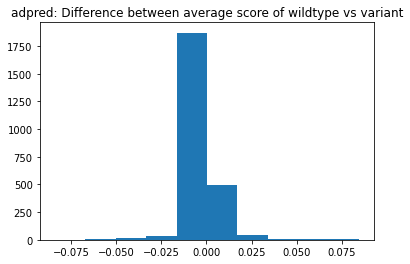

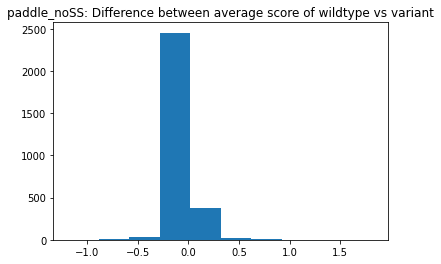

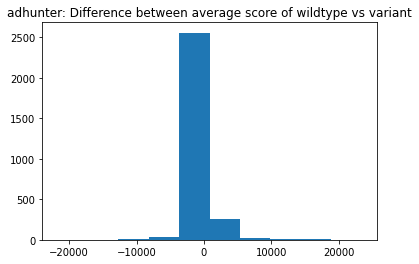

In [104]:
for predictor in ["adpred", "paddle_noSS", "adhunter"]:
    plt.figure()
    plt.title(predictor + ": Difference between average score of wildtype vs variant")
    plt.hist(results_restruc[predictor + "_avg_diff"])
    plt.show;

In [129]:
for predictor in ["adpred", "paddle_noSS", "adhunter"]:
    top_threshold = results_restruc[predictor + "_avg_diff"].quantile(0.975)
    bottom_threshold = results_restruc[predictor + "_avg_diff"].quantile(0.025)
    
    crit_1 = results_restruc[predictor + "_avg_diff"] > top_threshold
    crit_2 = results_restruc[predictor + "_avg_diff"] < bottom_threshold
    
    results_restruc[predictor + "_outlier"] = crit_1 | crit_2
    
    results_restruc[predictor + "_outlier"] = results_restruc[predictor + "_outlier"].astype(int)

results_restruc

,id,wt_adpred_avg,var_adpred_avg,wt_paddle_noSS_avg,var_paddle_noSS_avg,wt_adhunter_avg,var_adhunter_avg,seq,adpred_avg_diff,paddle_noSS_avg_diff,adhunter_avg_diff,adpred_outlier,paddle_noSS_outlier,adhunter_outlier,num_outliers
0,GLIS1_Q8NBF1_AD_447-620|g.53506627C>T(p.Asp619...,0.073225,0.066847,1.058039,1.040670,48889.366030,48932.122685,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,-0.006378,-0.017368,42.756655,0,0,0,False
1,SRCAP_Q6ZRS2_AD_198-1445|g.30711973A>C(p.Glu54...,-inf,-inf,0.066873,0.071697,39497.497587,39537.376146,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,NaN,0.004824,39.878559,0,0,0,False
2,GLIS1_Q8NBF1_AD_447-620|g.53506630T>C(p.Thr618...,0.073225,0.073093,1.058039,1.049132,48889.366030,48961.368924,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,-0.000132,-0.008906,72.002894,0,0,0,False
3,SRCAP_Q6ZRS2_AD_198-1445|g.30711975G>A(p.Glu54...,-inf,-inf,0.066873,0.054188,39497.497587,39515.172017,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,NaN,-0.012685,17.674430,0,0,0,False
4,SRCAP_Q6ZRS2_AD_198-1445|g.30711977A>T(p.Glu54...,-inf,-inf,0.066873,0.068136,39497.497587,39533.580027,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,NaN,0.001263,36.082440,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,TFE3_P19532_AD_472-575|g.49030459G>A(p.Thr476Met),0.277460,0.277493,5.854923,5.855140,113618.543990,113772.464964,PGAAMFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.000033,0.000217,153.920974,0,0,0,False
3006,TFE3_P19532_AD_472-575|g.49030465G>A(p.Ala474Val),0.277460,0.277469,5.854923,5.851830,113618.543990,113622.947596,PGVATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.000009,-0.003093,4.403606,0,0,0,False
3007,TFE3_P19532_AD_472-575|g.49030466C>T(p.Ala474Thr),0.277460,0.277462,5.854923,5.857028,113618.543990,113605.669892,PGTATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.000002,0.002105,-12.874099,0,0,0,False
3008,TFE3_P19532_AD_472-575|g.49030468C>T(p.Gly473Asp),0.277460,0.277476,5.854923,5.867763,113618.543990,113632.549760,PDAATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.000016,0.012840,14.005769,0,0,0,False


In [130]:
results_restruc["num_outliers"] = results_restruc["adpred_outlier"] + results_restruc["paddle_noSS_outlier"] + results_restruc["adhunter_outlier"]
results_restruc

,id,wt_adpred_avg,var_adpred_avg,wt_paddle_noSS_avg,var_paddle_noSS_avg,wt_adhunter_avg,var_adhunter_avg,seq,adpred_avg_diff,paddle_noSS_avg_diff,adhunter_avg_diff,adpred_outlier,paddle_noSS_outlier,adhunter_outlier,num_outliers
0,GLIS1_Q8NBF1_AD_447-620|g.53506627C>T(p.Asp619...,0.073225,0.066847,1.058039,1.040670,48889.366030,48932.122685,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,-0.006378,-0.017368,42.756655,0,0,0,0
1,SRCAP_Q6ZRS2_AD_198-1445|g.30711973A>C(p.Glu54...,-inf,-inf,0.066873,0.071697,39497.497587,39537.376146,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,NaN,0.004824,39.878559,0,0,0,0
2,GLIS1_Q8NBF1_AD_447-620|g.53506630T>C(p.Thr618...,0.073225,0.073093,1.058039,1.049132,48889.366030,48961.368924,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,-0.000132,-0.008906,72.002894,0,0,0,0
3,SRCAP_Q6ZRS2_AD_198-1445|g.30711975G>A(p.Glu54...,-inf,-inf,0.066873,0.054188,39497.497587,39515.172017,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,NaN,-0.012685,17.674430,0,0,0,0
4,SRCAP_Q6ZRS2_AD_198-1445|g.30711977A>T(p.Glu54...,-inf,-inf,0.066873,0.068136,39497.497587,39533.580027,MAKDVRQFWSNVEKVVQFKQQSRLEEKRKKALDLHLDFIVGQTEKY...,NaN,0.001263,36.082440,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,TFE3_P19532_AD_472-575|g.49030459G>A(p.Thr476Met),0.277460,0.277493,5.854923,5.855140,113618.543990,113772.464964,PGAAMFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.000033,0.000217,153.920974,0,0,0,0
3006,TFE3_P19532_AD_472-575|g.49030465G>A(p.Ala474Val),0.277460,0.277469,5.854923,5.851830,113618.543990,113622.947596,PGVATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.000009,-0.003093,4.403606,0,0,0,0
3007,TFE3_P19532_AD_472-575|g.49030466C>T(p.Ala474Thr),0.277460,0.277462,5.854923,5.857028,113618.543990,113605.669892,PGTATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.000002,0.002105,-12.874099,0,0,0,0
3008,TFE3_P19532_AD_472-575|g.49030468C>T(p.Gly473Asp),0.277460,0.277476,5.854923,5.867763,113618.543990,113632.549760,PDAATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.000016,0.012840,14.005769,0,0,0,0


In [133]:
pred_changes = results_restruc[results_restruc["num_outliers"] != 0]
pred_changes

,id,wt_adpred_avg,var_adpred_avg,wt_paddle_noSS_avg,var_paddle_noSS_avg,wt_adhunter_avg,var_adhunter_avg,seq,adpred_avg_diff,paddle_noSS_avg_diff,adhunter_avg_diff,adpred_outlier,paddle_noSS_outlier,adhunter_outlier,num_outliers
5,GLIS1_Q8NBF1_AD_447-620|g.53506633A>G(p.Tyr617...,0.073225,0.050578,1.058039,1.054051,48889.36603,47977.070023,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,-0.022647,-0.003987,-912.296007,1,0,0,1
7,GLIS1_Q8NBF1_AD_447-620|g.53506638G>A(p.Ser615...,0.073225,0.095082,1.058039,1.035733,48889.36603,49265.154861,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,0.021857,-0.022306,375.788831,1,0,0,1
9,GLIS1_Q8NBF1_AD_447-620|g.53506641G>A(p.Pro614...,0.073225,0.093786,1.058039,0.962274,48889.36603,48131.349016,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,0.020561,-0.095765,-758.017014,1,0,0,1
22,GLIS1_Q8NBF1_AD_447-620|g.53506687C>A(p.Gly599...,0.073225,0.100899,1.058039,1.033194,48889.36603,51263.706771,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,0.027674,-0.024845,2374.340741,1,0,0,1
24,GLIS1_Q8NBF1_AD_447-620|g.53506693C>G(p.Asp597...,0.073225,0.039691,1.058039,0.893912,48889.36603,47397.131771,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,-0.033534,-0.164126,-1492.234259,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,TFE3_P19532_AD_472-575|g.49030306T>A(p.Glu527Val),0.277460,0.270002,5.854923,5.571432,113618.54399,120783.074399,PGAATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,-0.007458,-0.283491,7164.530409,0,1,1,2
2989,TFE3_P19532_AD_472-575|g.49030310T>A(p.Met526Leu),0.277460,0.280213,5.854923,6.310118,113618.54399,113831.481430,PGAATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.002753,0.455195,212.937440,0,1,0,1
2990,TFE3_P19532_AD_472-575|g.49030334G>A(p.His518Tyr),0.277460,0.294097,5.854923,6.562412,113618.54399,130001.596755,PGAATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDHLGDLGDPF...,0.016637,0.707489,16383.052764,0,1,1,2
2991,TFE3_P19532_AD_472-575|g.49030361G>T(p.His509Asn),0.277460,0.261277,5.854923,5.981104,113618.54399,106138.964784,PGAATFHVGGGPAQNAPHQQPPAPPSDALLDLHFPSDNLGDLGDPF...,-0.016183,0.126181,-7479.579207,0,0,1,1


In [135]:
pred_changes["num_outliers"].value_counts()

1    146
2     70
3     44
Name: num_outliers, dtype: int64

In [136]:
pred_changes[pred_changes["num_outliers"] == 3]

,id,wt_adpred_avg,var_adpred_avg,wt_paddle_noSS_avg,var_paddle_noSS_avg,wt_adhunter_avg,var_adhunter_avg,seq,adpred_avg_diff,paddle_noSS_avg_diff,adhunter_avg_diff,adpred_outlier,paddle_noSS_outlier,adhunter_outlier,num_outliers
30,GLIS1_Q8NBF1_AD_447-620|g.53506707G>A(p.Ser592...,0.073225,0.105878,1.058039,1.339955,48889.366030,53522.812153,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,0.032653,0.281916,4633.446123,1,1,1,3
83,GLIS1_Q8NBF1_AD_447-620|g.53509231G>A(p.Arg532...,0.073225,0.147509,1.058039,1.520008,48889.366030,61099.716059,AESTRDGLGPGLLSPIVSPLKGLGPPPLPPSSQSHSPGGQPFPTLP...,0.074284,0.461970,12210.350029,1,1,1,3
586,ERG_P11308_AD_118-261|g.38403566T>C(p.Arg185Gly),0.209512,0.255684,0.303883,0.476986,54102.331734,58522.387946,KHMPPPNMTTNERRVIVPADPTLWSTDHVRQWLEWAVKEYGLPDVN...,0.046173,0.173103,4420.056213,1,1,1,3
596,ERG_P11308_AD_118-261|g.38403617G>C(p.Gln168Glu),0.209512,0.240751,0.303883,0.566511,54102.331734,57568.891369,KHMPPPNMTTNERRVIVPADPTLWSTDHVRQWLEWAVKEYGLPDVN...,0.031240,0.262628,3466.559635,1,1,1,3
906,ERG_P11308_AD_118-261|g.38403679C>T(p.Arg147Gln),0.209512,0.236535,0.303883,0.588391,54102.331734,62607.825074,KHMPPPNMTTNERRVIVPADPTLWSTDHVQQWLEWAVKEYGLPDVN...,0.027023,0.284508,8505.493341,1,1,1,3
929,CAMTA2_O94983_AD_472-581|g.4979698A>C(p.Trp542...,0.253336,0.218700,4.061217,3.619302,105185.091274,90889.776849,SPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,-0.034637,-0.441916,-14295.314426,1,1,1,3
932,CAMTA2_O94983_AD_472-581|g.4979728G>A(p.Leu532...,0.253336,0.274564,4.061217,4.350031,105185.091274,118534.768156,SPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,0.021227,0.288814,13349.676882,1,1,1,3
934,CAMTA2_O94983_AD_472-581|g.4979751G>A(p.Pro524...,0.253336,0.280007,4.061217,4.235443,105185.091274,109854.075979,SPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,0.026671,0.174226,4668.984705,1,1,1,3
935,CAMTA2_O94983_AD_472-581|g.4979757G>A(p.Pro522...,0.253336,0.290181,4.061217,4.419137,105185.091274,112975.451805,SPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELISDE...,0.036844,0.357920,7790.360530,1,1,1,3
938,CAMTA2_O94983_AD_472-581|g.4979777A>T(p.Ser515...,0.253336,0.236000,4.061217,3.689432,105185.091274,101281.798415,SPAPLEPSSRVGRGEALFGGPVGASELEPFSLSSFPDLMGELIRDE...,-0.017337,-0.371785,-3903.292859,1,1,1,3


In [138]:
pred_changes.to_csv("../output/all_predictors_var_effect_continuous.csv")